# Описание проекта

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

Файлы, в которых содержатся результаты запросов.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

# 1. Аналитика

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy import stats as st

warnings.filterwarnings('ignore')

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

display(query_1.info())
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Все данные имеют необходимый тип для дальнейшей работы.

In [3]:
display(query_1.head())
query_3.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [4]:
top_10_cities = query_3.sort_values(by='average_flights', ascending=False).head(10)
top_10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [5]:
display(query_1.isna().mean())
display(query_3.isna().mean())
top_10_cities.isna().mean()

model             0.0
flights_amount    0.0
dtype: float64

city               0.0
average_flights    0.0
dtype: float64

city               0.0
average_flights    0.0
dtype: float64

Данные повторяют результаты запросов из SQL в нужном формате. Пропусков нет.

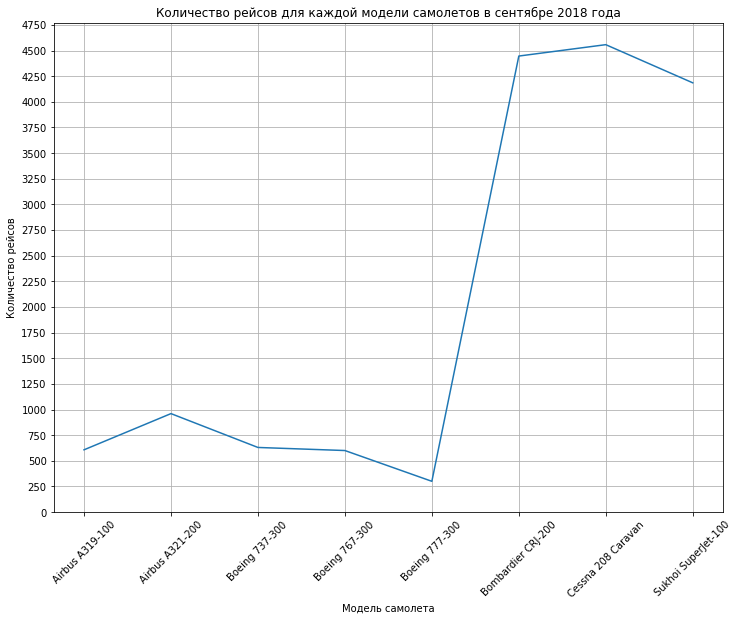

In [7]:
plt.figure(figsize=[12,9])
plt.plot(query_1['model'], query_1['flights_amount'])
plt.xlabel("Модель самолета")
plt.ylabel("Количество рейсов")
plt.grid(b=True)
plt.xticks(rotation=45)
plt.yticks(list(range(0, query_1['flights_amount'].max()+250, 250)))
plt.title("Количество рейсов для каждой модели самолетов в сентябре 2018 года")
plt.show()

На графике "Количество рейсов для каждой модели самолетов в сентябре 2018 года" имеется следующая зависимость:

Для моделей Borbardier, Cessna и Сухой суперджет наблюдаетеся высокая популярность по сравнению с другими моделми из-за дальности перелета. Эта линейка самолетов имеет среднюю дальность в 2000 км, чем популярен в западной части Россиии, где находится много городов близко друг к другу.

Остальные расчитаны на далекие перелеты к примеру Москва - Новосибирск - Владивосток.

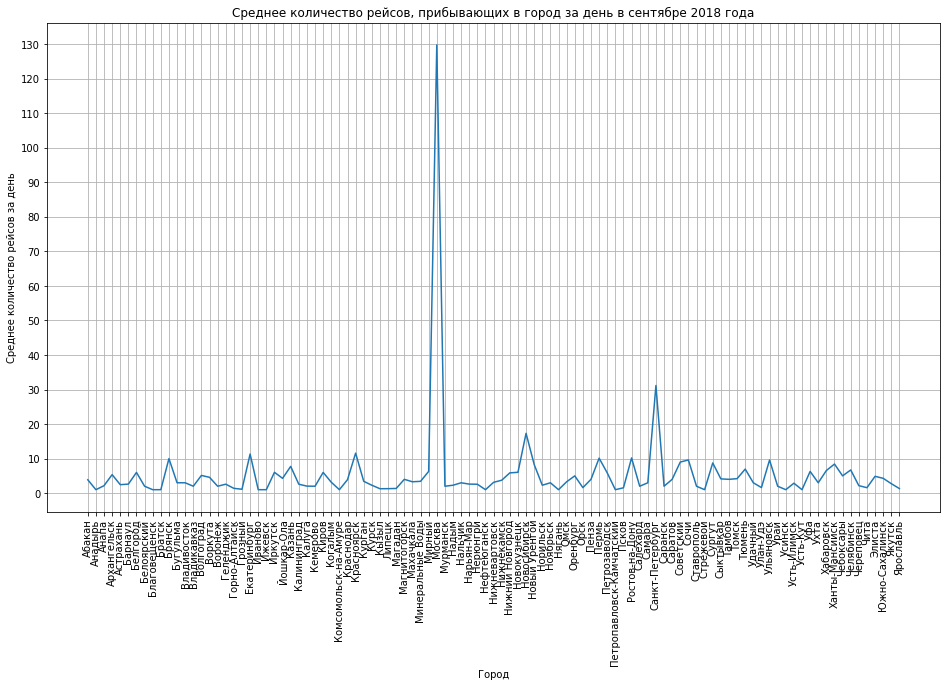

In [7]:
plt.figure(figsize=[16,9])
plt.plot(query_3['city'], query_3['average_flights'])
plt.xlabel("Город")
plt.ylabel("Среднее количество рейсов за день")
plt.grid(b=True)
plt.xticks(rotation=90)
plt.yticks(list(range(0, int(query_3['average_flights'].max()+10), 10)))
plt.title("Среднее количество рейсов, прибывающих в город за день в сентябре 2018 года")
plt.show()

На графике "Среднее количество рейсов, прибывающих в город за день в сентябре 2018 года" имеется следующая зависимость:

Популярными городами являются Москва, Санкт-Петербург и Новосибирск. Они являются важными воздушнотранспортными узлами, где можно пересесть на международный рейс или стыковочный. Также их популярность связанна с тем, сколько аэропортов имеет каждый город.

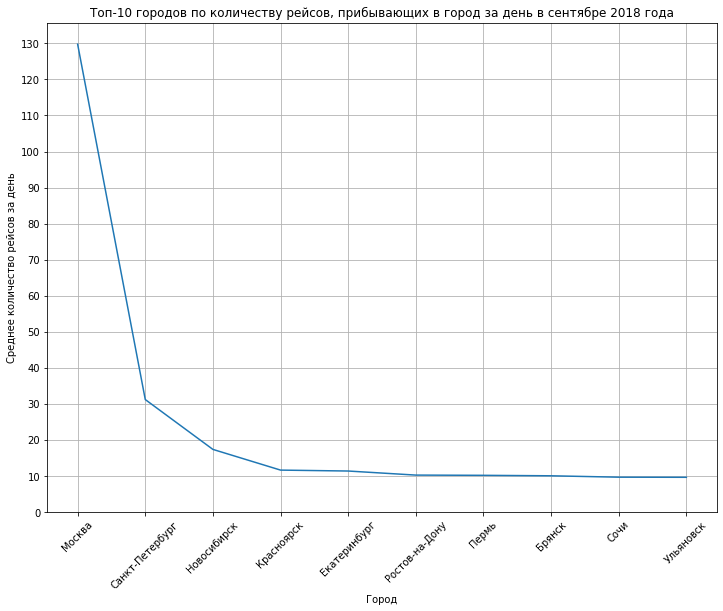

In [8]:
plt.figure(figsize=[12,9])
plt.plot(top_10_cities['city'], top_10_cities['average_flights'])
plt.xlabel("Город")
plt.ylabel("Среднее количество рейсов за день")
plt.grid(b=True)
plt.xticks(rotation=45)
plt.yticks(list(range(0, int(top_10_cities['average_flights'].max()+10), 10)))
plt.title("Топ-10 городов по количеству рейсов, прибывающих в город за день в сентябре 2018 года")
plt.show()

На графике "Топ-10 городов по количеству рейсов, прибывающих в город за день в сентябре 2018 года" имеется следующая зависимость:

Москва занимает первое место за счет большего количества аэропортов, чем у остальных городов. 

Кроме этого Москва, Санкт-Петербург, Новосибирск являются важными воздушними узлами для международных полетов. Большинство перелетов в этот город происходят из-за пересадки на другой рейс для полета за границу.

### Вывод по шагу 1

Все данные корректно были сформированы в запросы и был проведен их анализ.

# 2. Проверка гипотезы

In [9]:
query_last = pd.read_csv('/datasets/query_last.csv')
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [10]:
query_last.head()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


In [11]:
festival_weeks = query_last.dropna()
festival_weeks

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [12]:
no_festival_weeks = query_last.iloc[list(set(query_last.index) - set(festival_weeks.index))]
no_festival_weeks

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Нулевая гипотеза гласит: "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время".

Альтернативаня гипотеза: "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу". 

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднем спросе верно.

In [13]:
alpha = .05

results = st.ttest_ind(no_festival_weeks['ticket_amount'], festival_weeks['ticket_amount'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


### Вывод по шагу 2

По результатам теста Стьюдента получается, что наличие фестивалей не влияют на количество купленных билетов в городе Москва.

## Итоговый вывод.

Была проведена проверка и анализ данных, сформированных по результатам SQL запросов.

Было ожидаемо, что больше всего полетов будет в Москве и Санкт-Петербурге, так как они крупные города в России.
Указанные модели самолетов говорят о том, какой воздушный парк популярен в стране.

Фестивали не влияют на количество билетов в город Москва. Возможно это связано с тем, что полеты на самолеты на фестиваль не удобен из-за багажа и более дешевых способов доехать до города.